c:\Users\HP\Viral project\Viral-Load-Status-Classification\viral\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\Viral project\Viral-Load-Status-Classification\viral\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\Viral project\Viral-Load-Status-Classification\viral\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 3321, number of used features: 49
[LightGBM] [Info] Start training from score -0.037740
[LightGBM] [Info] Start training from score -6.498583
[LightGBM] [Info] Start training from score -3.337337
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

c:\Users\HP\Viral project\Viral-Load-Status-Classification\viral\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\Viral project\Viral-Load-Status-Classification\viral\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


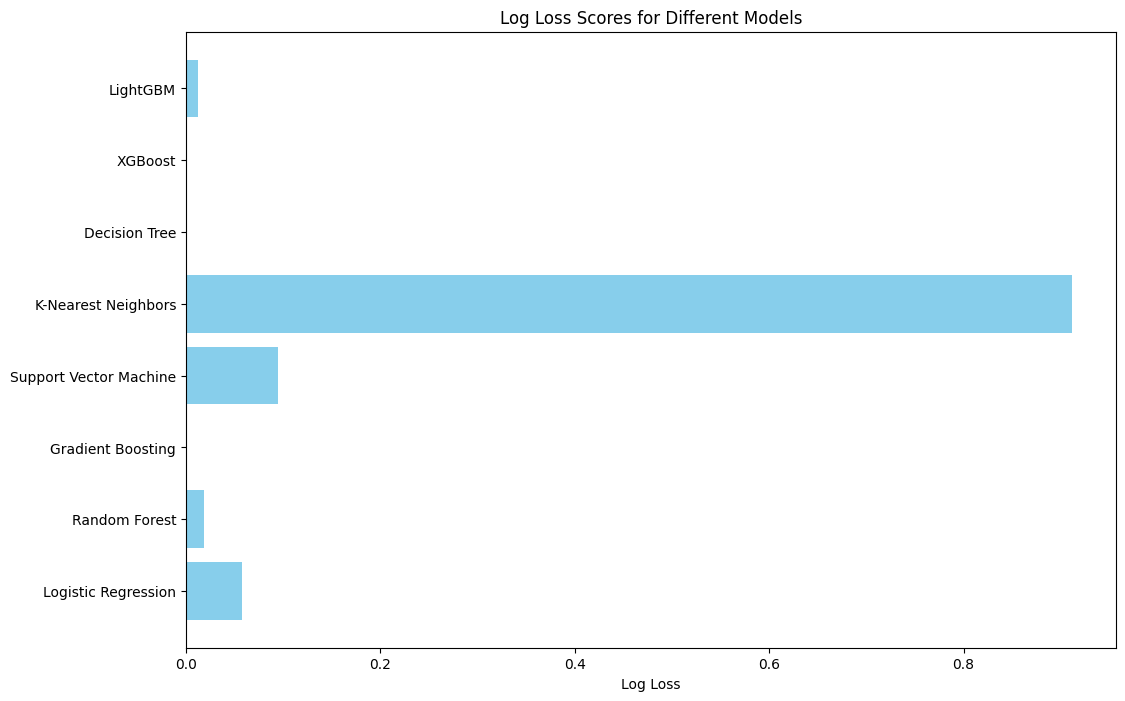

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       800
           1       0.00      0.00      0.00         2
           2       0.96      0.79      0.87        29

    accuracy                           0.99       831
   macro avg       0.65      0.60      0.62       831
weighted avg       0.99      0.99      0.99       831

Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       0.00      0.00      0.00         2
           2       1.00      1.00      1.00        29

    accuracy                           1.00       831
   macro avg       0.67      0.67      0.67       831
weighted avg       1.00      1.00      1.00       831

Model: Gradient Boosting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      1.00      1.00         2
  

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import classification_report, log_loss
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel(r'C:\Users\HP\Desktop\updated_research_data.xlsx', engine='openpyxl')

# Define the feature columns and the target variable
X = df.drop(columns=['viral_load_status'])
y = df['viral_load_status']

# Encode categorical variables
X = pd.get_dummies(X)
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models to be trained
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier()
}

# Train and evaluate each model
results = {}
log_losses = []
model_names = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
    else:
        y_prob = model.decision_function(X_test)
    
    # Store evaluation metrics and log loss score
    results[model_name] = {
        "Classification Report": classification_report(y_test, y_pred),
        "Log Loss": log_loss(y_test, y_prob)
    }
    
    log_losses.append(results[model_name]["Log Loss"])
    model_names.append(model_name)

# Plot Log Loss scores for all models
plt.figure(figsize=(12, 8))
plt.barh(model_names, log_losses, color='skyblue')
plt.xlabel('Log Loss')
plt.title('Log Loss Scores for Different Models')
plt.show()

# Print classification reports for all models
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(result["Classification Report"])